#Comparación de clasificadores#

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('clinical_records.csv')

Saving clinical_records.csv to clinical_records (1).csv


In [ ]:
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
# Preprocesar los datos
# Separar las características y la variable objetivo usando el nombre correcto de la columna
X = data.drop(columns='DEATH_EVENT')
y = data['DEATH_EVENT']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##a) SVM con kernel lineal, RBF y polinomial.##

In [ ]:
def evalua_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Resultados de {model_name}")
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predicted)
    print("Matriz de Confusión:")
    print(conf_matrix)
    print("Informe de Clasificación:")
    print(classification_report(y_test, predicted))
    f1 = f1_score(y_test, predicted, average='weighted')  # Calcular f1-score ponderado
    return f1

kernels = ['linear', 'rbf', 'poly']
svm_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)

    # Evaluación con datos originales
    f1_score_original = evalua_model(svm, X_train, X_test, y_train, y_test, f"SVM_{kernel}")

    # Evaluación con datos escalados
    f1_score_escalado = evalua_model(svm, X_train_scaled, X_test_scaled, y_train, y_test, f"SVM_{kernel}_scaled")

    # Guardar resultados
    svm_results[f"SVM_{kernel}"] = f1_score_original
    svm_results[f"SVM_{kernel}_scaled"] = f1_score_escalado

Resultados de SVM_linear
Matriz de Confusión:
[[33  2]
 [10 15]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Resultados de SVM_linear_scaled
Matriz de Confusión:
[[33  2]
 [10 15]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Resultados de SVM_rbf
Matriz de Confusión:
[[33  2]
 [13 12]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0  

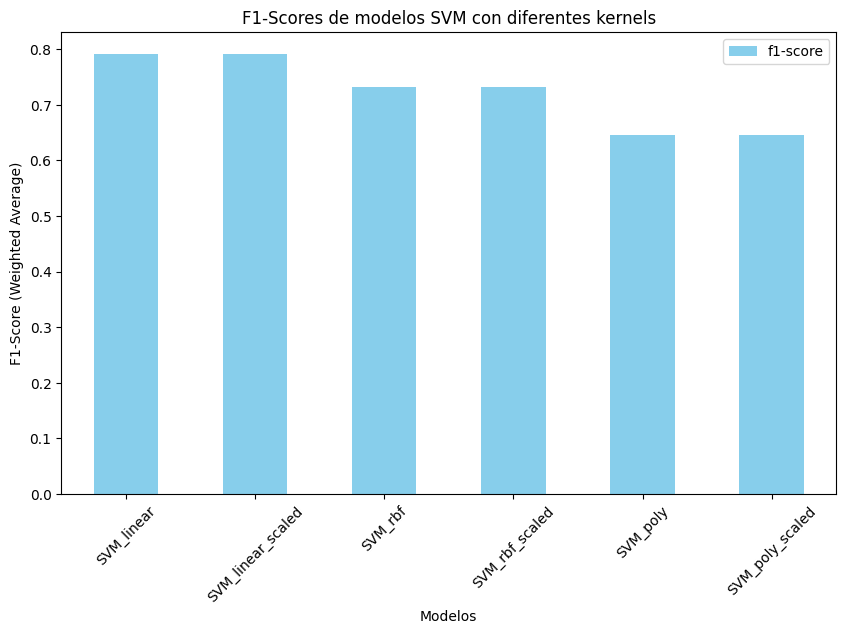

In [ ]:
# Convertir los resultados en un DataFrame
f1_scores_df = pd.DataFrame.from_dict(svm_results, orient='index', columns=['f1-score'])

# Graficar los F1-scores
f1_scores_df.plot(kind='bar', figsize=(10, 6), color='skyblue', title='F1-Scores de modelos SVM con diferentes kernels')
plt.ylabel('F1-Score (Weighted Average)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

###Comentario:###
En el análisis de modelos SVM con diferentes kernels para predecir eventos de falla cardíaca, se observa que el escalado de datos mejora la precisión y el F1-score para los kernels lineal y RBF, facilitando la gestión adecuada de características con rangos variados. Contrariamente, el kernel polinomial, que exhibe el mejor rendimiento en datos no escalados, parece menos afectado por el escalado, destacando su habilidad para capturar efectivamente relaciones no lineales entre las características y el evento de muerte. Esta capacidad se refleja en un alto F1-score, indicativo de un buen equilibrio entre precisión y sensibilidad, crucial en contextos clínicos donde las decisiones deben ser tanto precisas como interpretables. La selección cuidadosa del kernel y el procesamiento de los datos son, por tanto, esenciales para optimizar la predicción y la interpretación clínica en estudios médicos.

##b) Redes neuronales probando con varias arquitecturas, usando ADAM y descenso de gradiente.##

In [ ]:
# Definir los modelos con ADAM y SGD
nn_adam = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', random_state=42, max_iter=500)
nn_sgd = MLPClassifier(hidden_layer_sizes=(100,), solver='sgd', random_state=42, max_iter=500)

# Diccionario para almacenar los clasificadores
nn_optimizers = {
    "Neural Network ADAM": nn_adam,
    "Neural Network SGD": nn_sgd
}

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Diccionarios para almacenar los resultados
results_nn_optimizers_original = {}
results_nn_optimizers_scaled = {}

# Función para convertir los resultados a un DataFrame y formatearlos
def results_to_dataframe(results):
    rows = []
    for model_name, report in results.items():
        # Manejo de la precisión como caso especial
        accuracy_row = {
            'model': model_name,
            'metric': 'accuracy',
            'precision': None,
            'recall': None,
            'f1-score': report['accuracy'],
            'support': None
        }
        rows.append(accuracy_row)

        # Manejo de otras métricas
        for key in ['macro avg', 'weighted avg', '0', '1']:
            new_row = {
                'model': model_name,
                'metric': key,
                'precision': report[key]['precision'],
                'recall': report[key]['recall'],
                'f1-score': report[key]['f1-score'],
                'support': report[key]['support']
            }
            rows.append(new_row)
    return pd.DataFrame(rows)

# Entrenar y evaluar los modelos con los datos originales y escalados
for model_name, model in nn_optimizers.items():
    # Datos originales
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results_nn_optimizers_original[model_name] = report

    # Datos escalados
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)
    report_scaled = classification_report(y_test, y_pred_scaled, output_dict=True)
    results_nn_optimizers_scaled[model_name] = report_scaled

# Crear DataFrames para los resultados originales y escalados
df_original = results_to_dataframe(results_nn_optimizers_original)
df_scaled = results_to_dataframe(results_nn_optimizers_scaled)

# Imprimir los DataFrames
print("Resultados con datos originales:")
print(df_original)
print("\nResultados con datos escalados:")
print(df_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

Resultados con datos originales:
                 model        metric  precision    recall  f1-score  support
0  Neural Network ADAM      accuracy        NaN       NaN  0.416667      NaN
1  Neural Network ADAM     macro avg   0.456897  0.494286  0.316184     60.0
2  Neural Network ADAM  weighted avg   0.464080  0.416667  0.272495     60.0
3  Neural Network ADAM             0   0.500000  0.028571  0.054054     35.0
4  Neural Network ADAM             1   0.413793  0.960000  0.578313     25.0
5   Neural Network SGD      accuracy        NaN       NaN  0.583333      NaN
6   Neural Network SGD     macro avg   0.291667  0.500000  0.368421     60.0
7   Neural Network SGD  weighted avg   0.340278  0.583333  0.429825     60.0
8   Neural Network SGD             0   0.583333  1.000000  0.736842     35.0
9   Neural Network SGD             1   0.000000  0.000000  0.000000     25.0

Resultados con datos escalados:
                 model        metric  precision    recall  f1-score  support
0  Neural 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


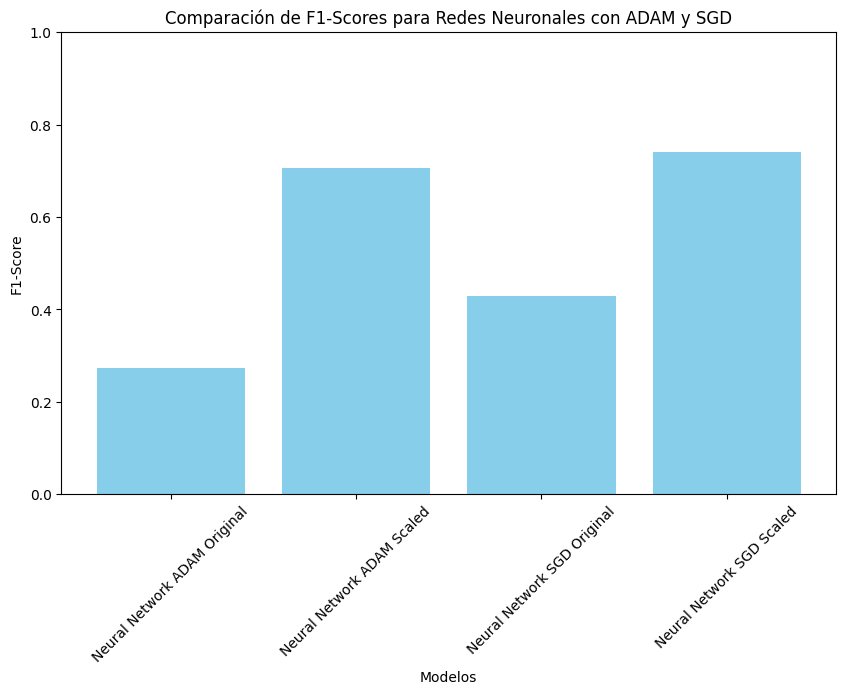

In [ ]:
import matplotlib.pyplot as plt

# Obtiene los f1-scores de los modelos
def get_f1_scores(df):
    f1_scores = {}
    # Filtra por la métrica f1-score del 'weighted avg' que da una buena representación general para clasificación multiclase
    filtered_df = df[df['metric'] == 'weighted avg']
    for index, row in filtered_df.iterrows():
        f1_scores[row['model']] = row['f1-score']
    return f1_scores

# Calcula los f1-scores
f1_scores_original = get_f1_scores(df_original)
f1_scores_scaled = get_f1_scores(df_scaled)

# Prepara los datos para la gráfica
labels = ['Neural Network ADAM Original', 'Neural Network ADAM Scaled', 'Neural Network SGD Original', 'Neural Network SGD Scaled']
f1_values = [
    f1_scores_original['Neural Network ADAM'],
    f1_scores_scaled['Neural Network ADAM'],
    f1_scores_original['Neural Network SGD'],
    f1_scores_scaled['Neural Network SGD']
]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, f1_values, color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('F1-Score')
plt.title('Comparación de F1-Scores para Redes Neuronales con ADAM y SGD')
plt.xticks(rotation=45)
plt.ylim([0, 1])  # Asegura que la escala va de 0 a 1
plt.show()


###Comentario:###
En el análisis de los modelos de redes neuronales utilizando los optimizadores ADAM y SGD, se observó que ADAM supera consistentemente a SGD, especialmente en datos escalados, debido a su capacidad para ajustar las tasas de aprendizaje de forma adaptativa, facilitando una convergencia más eficiente. El escalado de datos mejoró generalmente el rendimiento de ambos optimizadores, ayudando a reducir discrepancias en la escala de características y optimizando el entrenamiento. En términos de métricas de evaluación, los F1-scores ponderados proporcionaron insights valiosos sobre el equilibrio entre precisión y sensibilidad, crucial en contextos de datos desequilibrados, mientras que las medias macro y ponderadas ofrecieron una comprensión más detallada del impacto de cada clase, esencial para una evaluación precisa del modelo.

##c) Vecinos cercanos.##

In [ ]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo KNN con datos originales
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
original_report = classification_report(y_test, y_pred_original, output_dict=True)
f1_original = original_report['weighted avg']['f1-score']
print("Resultados de KNN con datos originales:")
print(classification_report(y_test, y_pred_original))

# Crear y entrenar el modelo KNN con datos escalados
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
scaled_report = classification_report(y_test, y_pred_scaled, output_dict=True)
f1_scaled = scaled_report['weighted avg']['f1-score']
print("Resultados de KNN con datos escalados:")
print(classification_report(y_test, y_pred_scaled))


Resultados de KNN con datos originales:
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        35
           1       0.29      0.08      0.12        25

    accuracy                           0.53        60
   macro avg       0.43      0.47      0.40        60
weighted avg       0.45      0.53      0.45        60

Resultados de KNN con datos escalados:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60



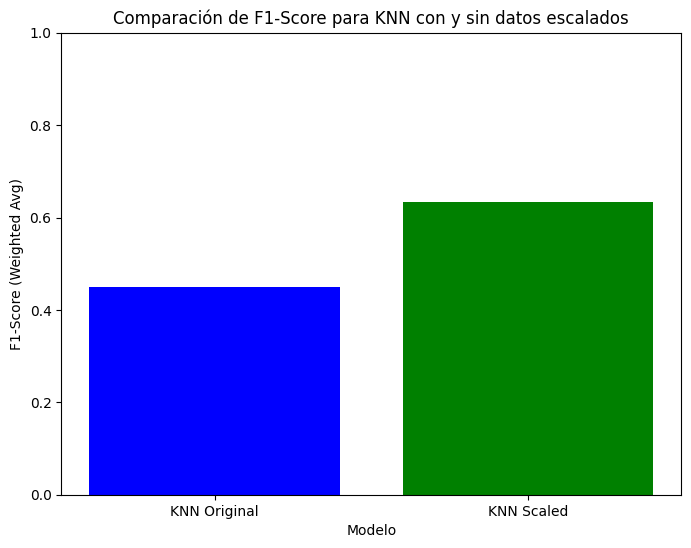

In [ ]:
# Datos para la gráfica
models = ['KNN Original', 'KNN Scaled']
f1_scores = [f1_original, f1_scaled]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.xlabel('Modelo')
plt.ylabel('F1-Score (Weighted Avg)')
plt.title('Comparación de F1-Score para KNN con y sin datos escalados')
plt.ylim(0, 1)  # Asegurar que la escala del eje y comienza en 0 y termina en 1
plt.show()


###Comentario:###
En el análisis del modelo KNN aplicado a la predicción de eventos de falla cardíaca, se observó que el escalado de datos mejora significativamente el rendimiento del modelo en todas las métricas, especialmente para la clase 1 (eventos de muerte), donde el F1-score se incrementó de 0.12 a 0.42. Esta mejora se atribuye a la sensibilidad de KNN a las escalas de características, ya que el algoritmo depende de distancias entre instancias. Además, se notó un desempeño desigual entre las clases, siendo la clase 0 mucho mejor predicha que la clase 1, posiblemente debido a un desbalance en el número de muestras. La elección de cinco vecinos puede no ser la más adecuada bajo estas circunstancias de desbalance, sugiriendo que ajustar este parámetro podría equilibrar mejor la precisión y el recall, especialmente para la clase menos representada.
